<a href="https://colab.research.google.com/github/kavithasub/uh-study-modules/blob/main/data-science-project/project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

# Project Title:
● Predict stage of lung cancer caused by smoking using machine learning models

# Objectives:
● Preprocess and analyze demographic and clinical data to identify key features
 related to lung cancer.

● Develop and compare machine learning models to predict the lung cancer stage.

● Evaluate model performance using accuracy, recall, F1-score and precision.

● Identify the most important features contributing to lung cancer by stage.

● Provide insights and recommendations for smoker lung cancer stage detection based on model findings.

# Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, classification_report, det_curve, confusion_matrix
from scipy.stats import randint


# Data Cleaning and Preprocessing

###Read CSV

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sample_data/lung_cancer.csv')
df.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [6]:
df.shape

(53427, 7)

In [7]:
df.describe()

,pid,age,days_to_cancer
count,53427.000000,53427.000000,2033.000000
mean,149778.048346,61.417448,1047.207083
std,44860.640458,5.023601,743.052899
min,100001.000000,43.000000,0.000000
25%,113363.500000,57.000000,398.000000
50%,126734.000000,60.000000,928.000000
75%,205491.500000,65.000000,1722.000000
max,218894.000000,79.000000,2618.000000


### Get value counts for each attributes

In [3]:
## Get value counts for each attributes
def get_value_counts(dataframe,col_list):
    for col in col_list:
        print(dataframe[col].value_counts())
        print('\n')

In [4]:
get_value_counts(df, ['gender', 'smoker', 'race', 'stage_of_cancer'])

## Result shows value counts are not in other type

gender
Male      31517
Female    21910
Name: count, dtype: int64


smoker
Former     27680
Current    25747
Name: count, dtype: int64


race
White                                        48527
Black or African-American                     2375
Asian                                         1095
More than one race                             678
Native Hawaiian or Other Pacific Islander      192
American Indian or Alaskan Native              190
Participant refused to answer                  109
Name: count, dtype: int64


stage_of_cancer
IA      621
IV      596
IIIB    246
IIIA    213
IB      210
IIB      79
IIA      67
Name: count, dtype: int64




### Check NAN valued attributes

In [5]:
df['stage_of_cancer'].unique()

array([nan, 'IA', 'IIB', 'IV', 'IIIB', 'IIIA', 'IIA', 'IB'], dtype=object)

In [6]:
df['race'].unique()

array(['White', 'Native Hawaiian or Other Pacific Islander',
       'More than one race', 'Asian', nan, 'Black or African-American',
       'American Indian or Alaskan Native',
       'Participant refused to answer'], dtype=object)

In [7]:
df['days_to_cancer'].unique()

array([  nan,  454., 2428., ..., 2220., 1077., 1632.])

### Replace NAN values



In [8]:
df_lung_cancer = df.fillna({'stage_of_cancer':0, 'days_to_cancer':0, 'race':'Other'})
df_lung_cancer.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,0.0,0
1,100002,66,Male,White,Current,0.0,0
2,100003,64,Male,White,Current,0.0,0
3,100004,60,Male,White,Former,0.0,0
4,100005,64,Male,White,Former,0.0,0


## Find missing values
missing data can be removed if very less amount of data else it can be filled with mean values.

In [13]:
df_lung_cancer.isnull().sum()

,0
pid,0
age,0
gender,0
race,0
smoker,0
days_to_cancer,0
stage_of_cancer,0


**There is no missing values in this data set**

## Convert categorical values of stage_of_cancer to 1,2,0

In [9]:
pd.set_option('future.no_silent_downcasting', True)

In [10]:
df_lung_cancer['stage_of_cancer'] = df_lung_cancer['stage_of_cancer'].replace({'IA': 1, 'IB' : 1,'IIA':1,
                                                       'IIB':1,'IIIA':2,'IIIB':2,'IV':2})

# Exploratory Data Analysis

### Plot few graphs to understand interelations of attributes

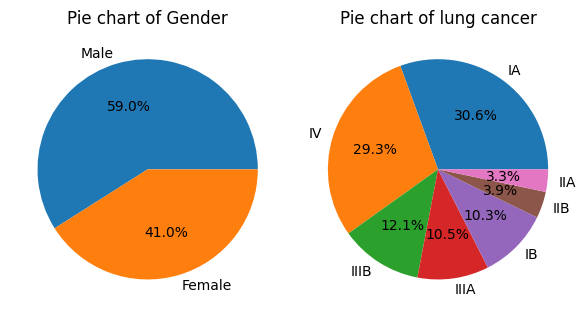

In [15]:
## Draw pie chart for gender and lung cancer distribution
fig,axes = plt.subplots(1,2,figsize=(6,6))
axes[0].pie(df_lung_cancer['gender'].value_counts(),labels=df_lung_cancer['gender'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Pie chart of Gender')
axes[1].pie(df['stage_of_cancer'].value_counts(),labels=df['stage_of_cancer'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Pie chart of lung cancer')
plt.tight_layout()
plt.show()

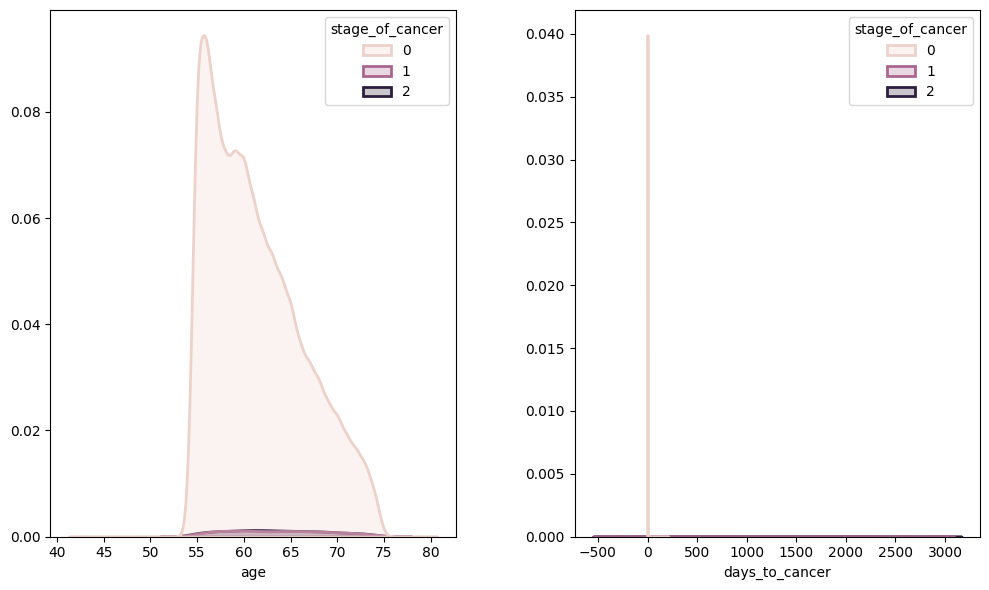

In [16]:
## More plots to see distributions
select_cols = ['stage_of_cancer', 'age', 'days_to_cancer']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax = ax.flatten()

for i, col in enumerate(df_lung_cancer[select_cols].columns[1:]):
    sns.kdeplot(x=col, data=df_lung_cancer, ax=ax[i], fill=True, lw=2, hue = 'stage_of_cancer')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

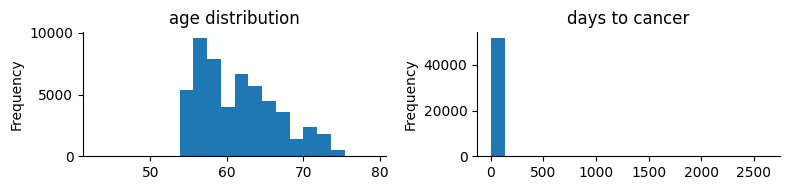

In [17]:
fig,axes = plt.subplots(1,2,figsize=(8,2))

df_lung_cancer['age'].plot(kind='hist', bins=20, title='age distribution', ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)
df_lung_cancer['days_to_cancer'].plot(kind='hist', bins=20, title='days to cancer', ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)


plt.tight_layout()
plt.show()

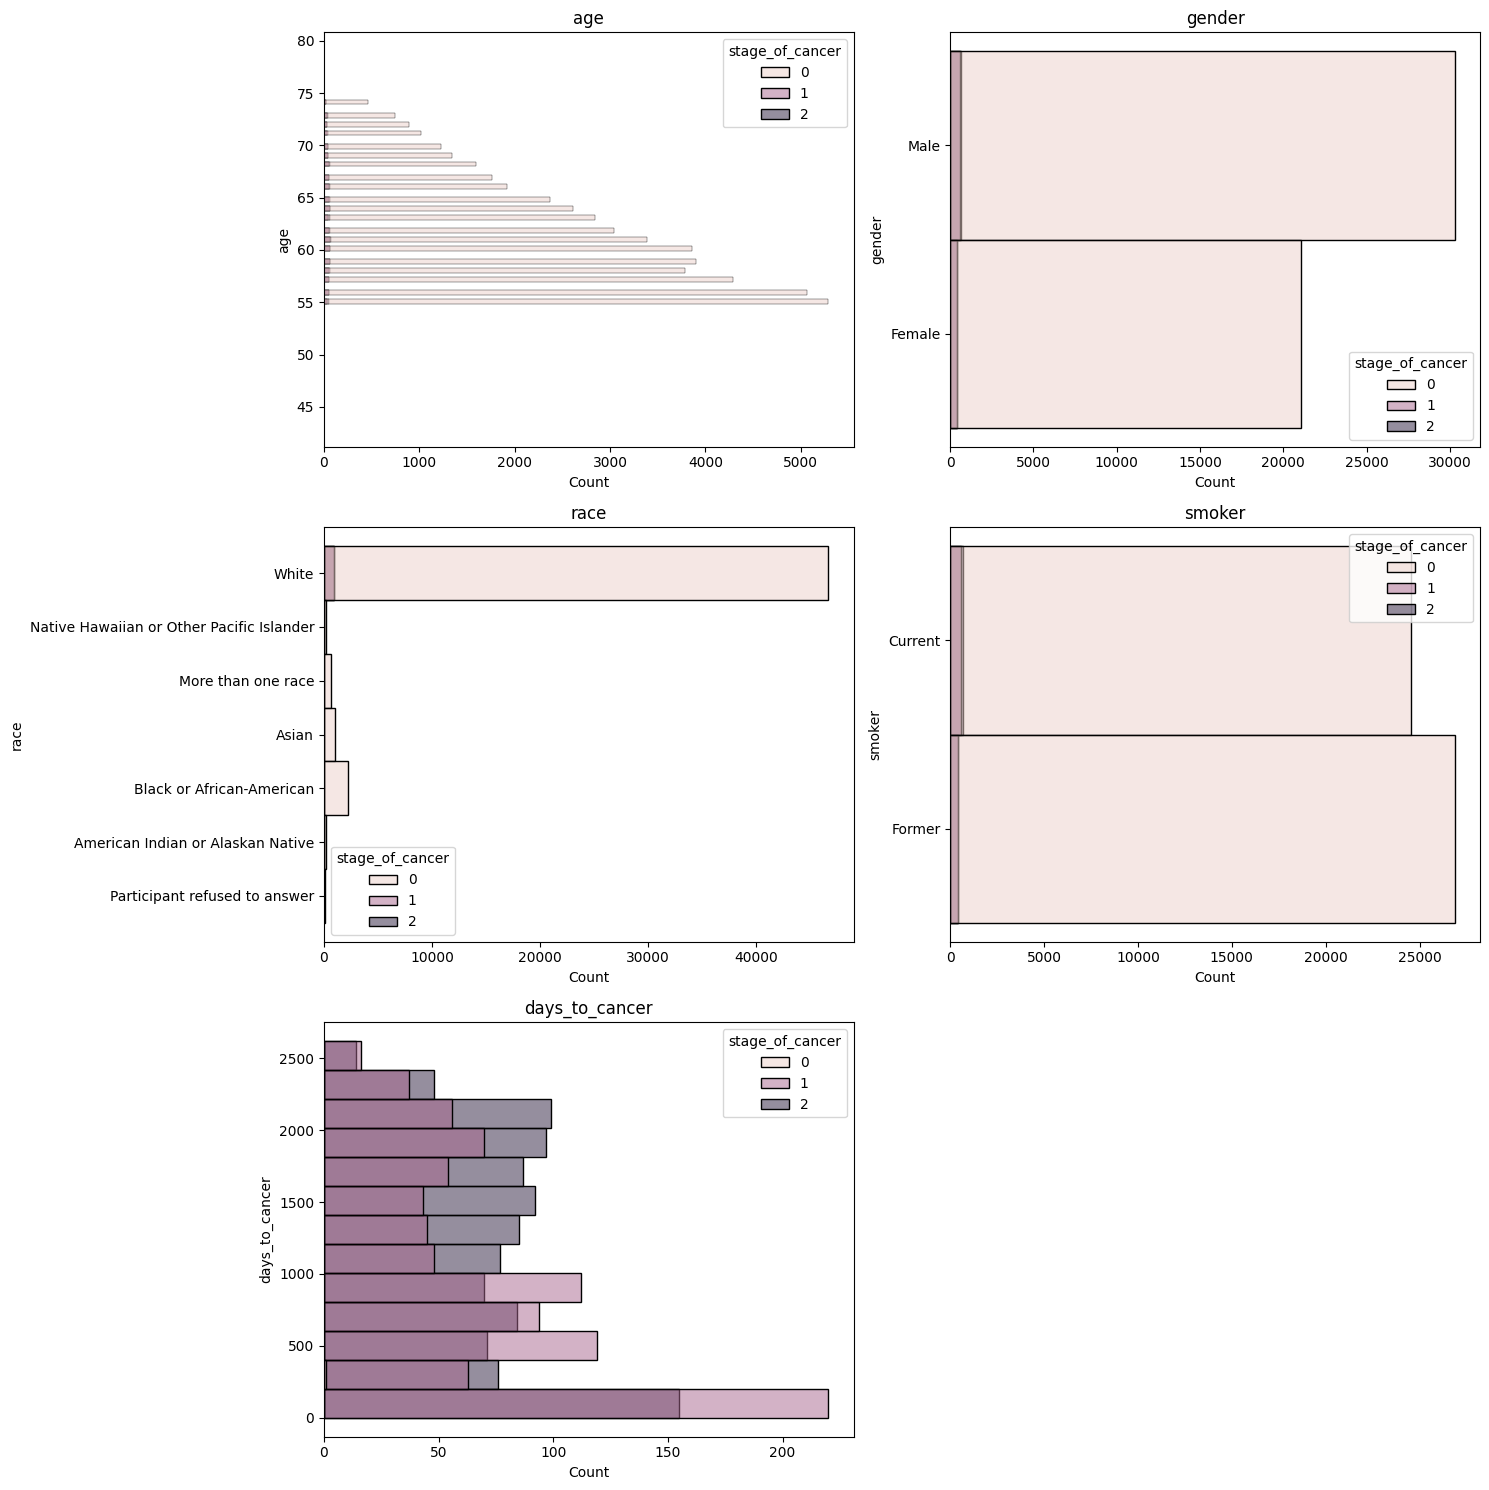

In [18]:
col=['age', 'gender', 'race', 'smoker', 'days_to_cancer']
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.title(col[i])
    sns.histplot(data=df_lung_cancer,y=df[col[i]],hue='stage_of_cancer')

plt.tight_layout()
plt.show()

Couldn't plot correlation table(heatmap to see relationship between attributes) because most attributes are catgorical

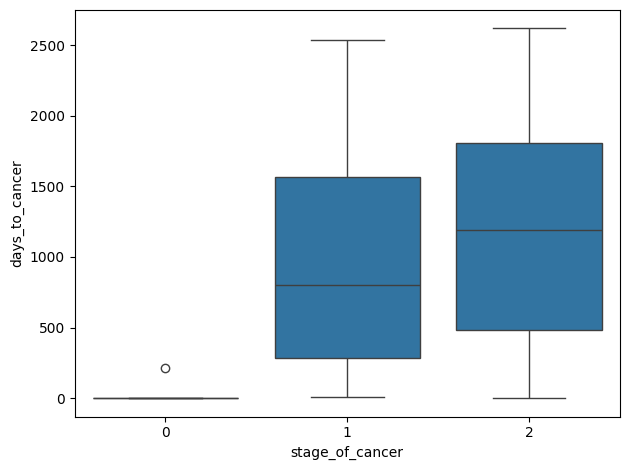

In [21]:
# Find outliers

sns.boxplot(x='stage_of_cancer', y='days_to_cancer', data=df_lung_cancer)
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

drop 0 and draw analys 1,2 ==> need to do

### Data transformation

In [22]:
## Encode values for categorical type attributes
category_cols = ['gender', 'race', 'smoker', 'stage_of_cancer']

le = LabelEncoder()
for label in category_cols:
    df_lung_cancer[label] = le.fit_transform(df_lung_cancer[label])
df_lung_cancer.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,1,7,0,0.0,0
1,100002,66,1,7,0,0.0,0
2,100003,64,1,7,0,0.0,0
3,100004,60,1,7,1,0.0,0
4,100005,64,1,7,1,0.0,0


In [24]:
df_lung_cancer['stage_of_cancer'].unique()

array([0, 1, 2])

###Split the data into training and test subsets

In [25]:
## Separate target variable from features
X = df_lung_cancer.drop(['pid','stage_of_cancer'],axis=1)
y = df_lung_cancer['stage_of_cancer']

In [26]:
## train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



### Apply standard scaler to transform data to same structure

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


# Model definition, Training and Prediction

## Smoker Lung Cancer Stage Classification Model

### Logistic Regression

In [29]:
## Logistic Regression
lr_model = LogisticRegression(max_iter=1000)


In [30]:
lr_model.fit(X_train_sc, y_train)

LogisticRegression(max_iter=1000)

In [31]:
lr_model.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.019629863597014578

In [32]:
lr_pred = lr_model.predict(X_test_sc)

#### Find Measures

In [50]:
## find accuracy on test set
lr_acc = accuracy_score(y_test, lr_pred)

print('Accuracy score on Test: ', lr_acc)

#print('Training Accuracy: ', accuracy_score(X_train_sc, y_train))

Accuracy score on Test:  0.982126146359723


In [43]:
## find recall and precision scores on test set
#lr_rec = recall_score(y_test, lr_pred)
#lr_prec = precision_score(y_test, lr_pred)

#print('Recall score on Test: ', lr_rec)
#print('Precision score on Test: ', lr_prec)

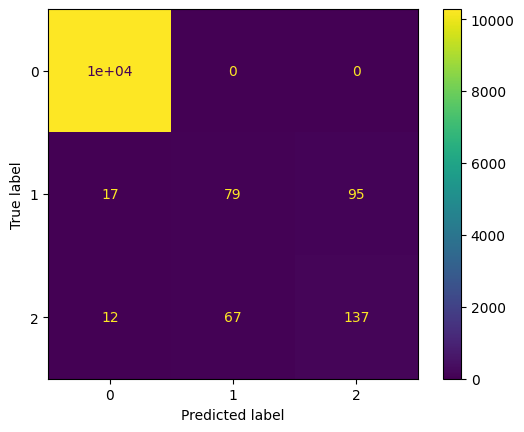

In [48]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_sc , y_test);

### Random Forest Clasifier

In [51]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)


In [52]:
rf_model.fit(X_train_sc , y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [53]:
rf_score = rf_model.score(X_train_sc , y_train)

In [54]:
rf_pred = rf_model.predict(X_test_sc)

#### Find Measures

In [56]:
## find accuracy on test set
rf_acc = accuracy_score(y_test , rf_pred)

print('Accuracy score on Test: ', rf_acc)


Accuracy score on Test:  0.9823133071308254


In [ ]:
rf_rec = recall_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
print('Recall score of Random Forest Classifier: ', rf_rec)
print('Precision score of Random Forest Classifier: ', rf_prec)

Confusion Matrix: 
 [[10279     0     0]
 [    0    99    92]
 [    0    97   119]]


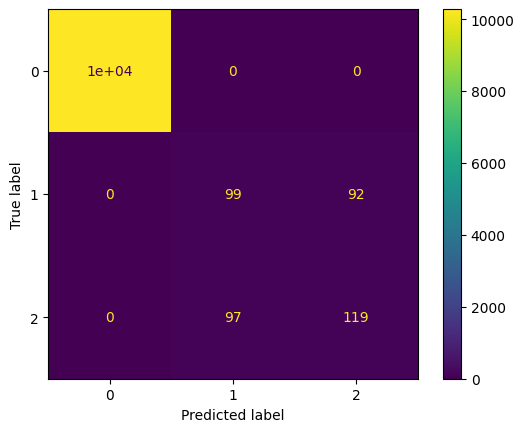

In [59]:
print('Confusion Matrix: \n', confusion_matrix(y_test,rf_pred))
ConfusionMatrixDisplay.from_estimator(rf_model , X_test_sc , y_test);

### KNN

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [61]:
knn_model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
knn_model.score(X_train_sc , y_train)

0.989799022016331

In [64]:
knn_pred = knn_model.predict(X_test_sc)

#### Find Measures

In [65]:
## find accuracy on test set
knn_acc = accuracy_score(y_test , knn_pred)

print('Accuracy score of KNN on Test: ', knn_acc)


Accuracy score of KNN on Test:  0.9818454052030694


In [ ]:
knn_rec = recall_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
print('Recall score of KNN: ', knn_rec)
print('Precision score of KNN: ', knn_prec)

Confusion Matrix: 
 [[10279     0     0]
 [   17    98    76]
 [   12    89   115]]


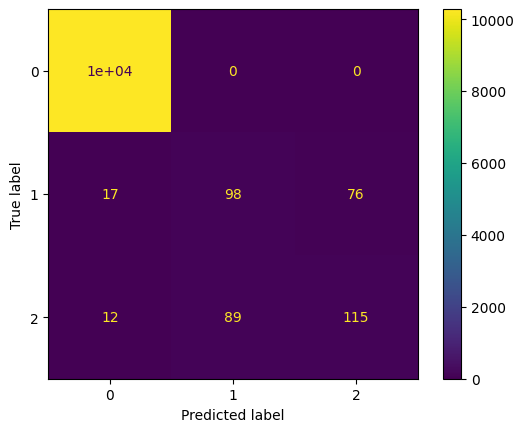

In [68]:
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_pred))
ConfusionMatrixDisplay.from_estimator(knn_model , X_test_sc , y_test);

### Score summary of models

In [71]:
## Display as table
scores = pd.DataFrame(columns = ["LRC", "RFC", "KNN"], index = ["ACC", "REC", "PREC"])
acc = [lr_acc, rf_acc, knn_acc]
scores.iloc[0, :] = acc
#rec = [dtc_rec, rf_rec, svc_rec, knn_rec]
#scores.iloc[1, :] = rec
#prec = [dtc_prec, rf_prec, svc_prec, knn_prec]
#scores.iloc[2, :] = prec
scores

,LRC,RFC,KNN
ACC,0.982126,0.982313,0.981845
REC,NaN,NaN,NaN
PREC,NaN,NaN,NaN


In [ ]:
from sklearn.decomposition import PCA


**Current Problem:**
- Accuracy scores from each method has no much difference
- Getting error for Recall and Precision measurements
- Due to above best model not selected

**Need to do:**
- Fix measurement issues
- Reserach on performance tuning techniques:- Identified so far 1. hyperparameter grid search for RF, 2. Principal component analysis for LR
- Trial and error best performance tuning technique
- Select best model
- Evaluate the model:- using learning curve ROC curve
